### Section 1: Sample Size

In [1]:
# 1. Generate the following. A reference for how to produce random normal observations can be found here. 
#    Use seed(205) to make sure the results are always the same.

import numpy as np

# a. x1: 5 observations from a random normal distribution with a mean of 15 and standard deviation of 2
np.random.seed(205)
x1 = np.random.normal(loc=15, scale=2, size=5)

# b. x2: 25 observations from a random normal distribution with a mean of 15 and standard deviation of 2
np.random.seed(205)
x2 = np.random.normal(loc=15, scale=2, size=25)

# c. x3: 125 observations from a random normal distribution with a mean of 15 and standard deviation of 2
np.random.seed(205)
x3 = np.random.normal(loc=15, scale=2, size=125)

# d. x4: 625 observations from a random normal distribution with a mean of 15 and standard deviation of 2
np.random.seed(205)
x4 = np.random.normal(loc=15, scale=2, size=625)

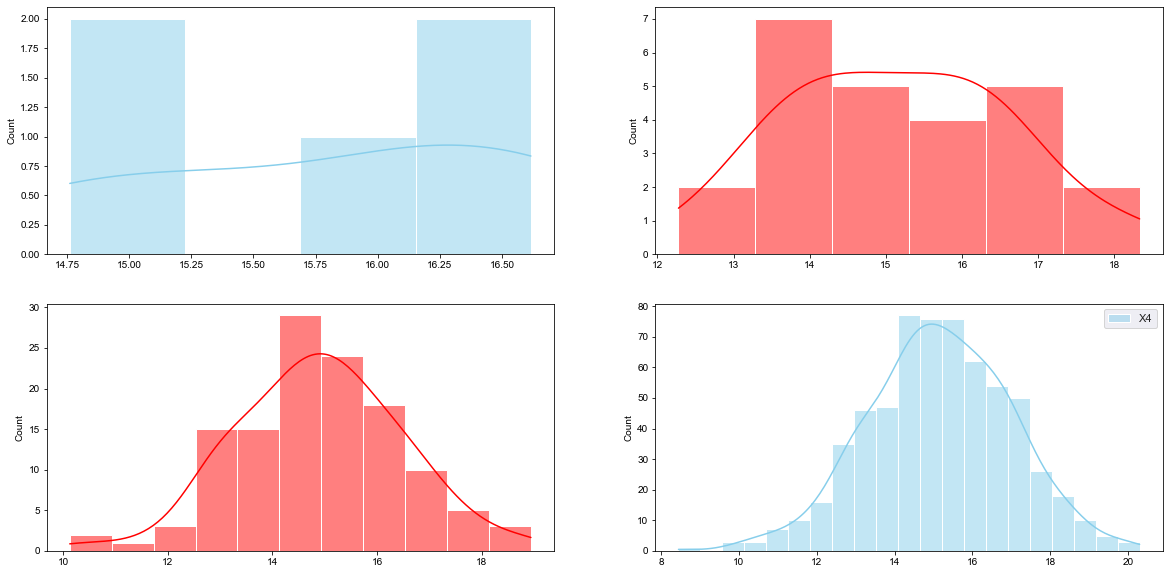

In [2]:
# 2. Use subplots to display the histograms of all four sets of numbers. 
#    An example of how to do this is here. Set kde=True to see how well the histogram approximates a normal p.d.f.
import seaborn as sns
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))

sns.set(style="darkgrid")  # set a grey background

sns.histplot(ax = ax1, x=x1, color="skyblue", label="X1", kde=True)
sns.histplot(ax = ax2, x=x2, color="red", label="X2", kde=True)
sns.histplot(ax = ax3, x=x3, color="red", label="X3", kde=True)
sns.histplot(ax = ax4, x=x4, color="skyblue", label="X4", kde=True)

plt.legend() 
plt.show()

In [3]:
# 3. Compute the sample means, standard deviations, and standard errors of x1, x2, x3, & x4.
def des_stats(arr):
    return arr.mean(), arr.std(), arr.std()/np.sqrt(len(arr))

print("[x1] mean =", des_stats(x1)[0], ", standard deviation =", des_stats(x1)[1], ", standard error =", des_stats(x1)[2])
print("[x2] mean =", des_stats(x2)[0], ", standard deviation =", des_stats(x2)[1], ", standard error =", des_stats(x2)[2])
print("[x3] mean =", des_stats(x3)[0], ", standard deviation =", des_stats(x3)[1], ", standard error =", des_stats(x3)[2])
print("[x4] mean =", des_stats(x4)[0], ", standard deviation =", des_stats(x4)[1], ", standard error =", des_stats(x4)[2])

[x1] mean = 15.804733419151095 , standard deviation = 0.7273193667178298 , standard error = 0.3252671090666331
[x2] mean = 15.154353015305679 , standard deviation = 1.4531134474453045 , standard error = 0.2906226894890609
[x3] mean = 14.885711751193654 , standard deviation = 1.5832455646262642 , standard error = 0.14160978830317453
[x4] mean = 15.14640063413449 , standard deviation = 1.8470380880223387 , standard error = 0.07388152352089356


In [4]:
# 4. Compare these to each other and the parameters of the distribution they come from. How do they differ?

*The means and standard deviations look similar to each other (even though x1 has a smaller standard deviation), since these distributions were drawn from the same mean and standard deviation. The standard errors are different, and as the sample size goes up, the standard error goes down. This is because standard error is based on sample size.* 

### Section 2: Poisson Distribution

In [5]:
# 1. Using numpy & seed(141), generate a Poisson distribution setting lam=10 and size=1000
np.random.seed(141)
xp = np.random.poisson(lam = 10, size = 1000)

In [6]:
# 2. Compute mean and variance of your 1000 random Poisson values
print("Mean =", xp.mean(), "\nVariance =", xp.var())

Mean = 10.075 
Variance = 10.199375


**3. Does the lambda = mean = variance?**  
*Yes, lambda, mean and variance are pretty much the same, with just slight deviation.*

In [7]:
# 4. Repeat 1-3 using size = 5. 
np.random.seed(141)
xp2 = np.random.poisson(lam = 10, size = 5)
print("Mean =", xp2.mean(), "\nVariance =", xp2.var())

Mean = 12.8 
Variance = 2.96


**Does lambda=mean=variance?**  
*In this case, lambda, mean and variance are not the same. Mean is slightly higher than mean, and variance is much smaller. This might due to small sample size.*

### Section 3: Analysis

**1. What is the outcome?**  
*The outcome is customer spending. To be more specific, it is how much customers spend, and possibly their spending habits (such as what products to buy and how often to buy).*

**2. What is the main effect/predictor he wants to understand the impact of?**  
*The main predictor he wants to understand is the launch of the promotion program.*

**3. What is the hypothesis?**  
*The hypothesis is: the promotion program has increased customer spending in the company.*  
*Alternatively, it could be: the difference between the amounts spent before and after the program started is different.*  
*The null hypothesis is: the difference between the amounts spent before and after the program started is due to chance (i.e. no true difference).*

In [8]:
import psycopg2
import pandas as pd

conn = psycopg2.connect(host="localhost",
                        database="dvdrental",
                        user="postgres",
                        password="password",
                        port = "5432")
sql = "with b4 as (select p.customer_id, sum(p.amount) as Payment_before\
            from rental r\
            left outer join payment p on p.rental_id = r.rental_id\
            where rental_date < cast('2005-07-29' as timestamp) and amount is not null\
            group by p.customer_id),\
        aft as ( select p.customer_id, sum(p.amount) as Payment_after from rental r\
                    left outer join payment p on p.rental_id = r.rental_id\
                    where rental_date >= cast('2005-07-29' as timestamp) and amount is not null\
                    group by p.customer_id\
           )\
            select distinct c.customer_id, store_id, first_name, last_name, active, payment_before, payment_after\
            from customer c\
            left outer join b4 r on r.customer_id = c.customer_id\
            left outer join aft a on a.customer_id = c.customer_id\
            where payment_after is not null and payment_before is not null"
cur = conn.cursor()
spending = pd.io.sql.read_sql(sql, conn)
cur.close()

In [9]:
# 1. Compute summary statistics and create histograms of the payment_before and payment_after variables. (Try using describe()in pandas).
spending[["payment_before", "payment_after"]].describe()

,payment_before,payment_after
count,599.000000,599.000000
mean,47.240835,55.116494
std,16.371236,18.066741
min,5.960000,4.980000
25%,34.935000,42.890000
50%,45.900000,53.880000
75%,57.865000,65.860000
max,108.760000,127.730000


<AxesSubplot:xlabel='payment_after', ylabel='Count'>

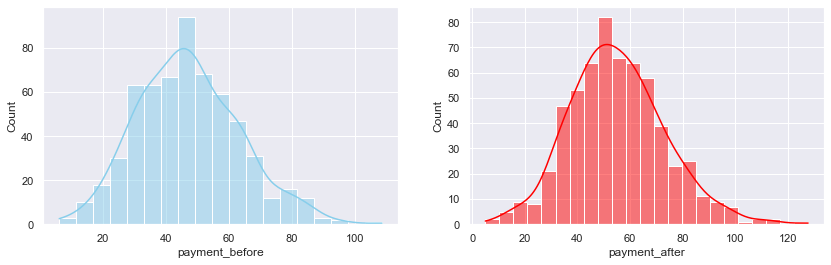

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,4))

sns.set(style="darkgrid")
sns.histplot(ax = ax[0], x = spending["payment_before"], color="skyblue", label="X1", kde=True)
sns.histplot(ax = ax[1], x = spending["payment_after"], color="red", label="X2", kde=True)

In [11]:
# 2. Compute the correlation between these two variables and create a scatterplot
np.corrcoef(spending["payment_before"], spending["payment_after"])[0,1]

0.07139783756138555

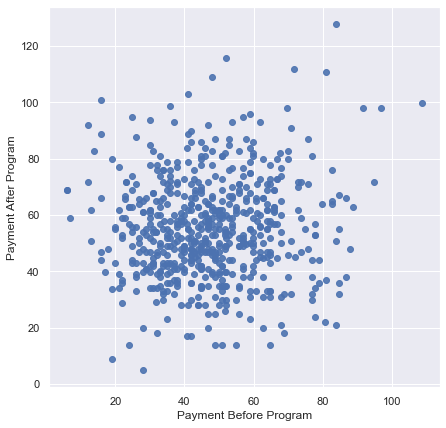

In [12]:
plt.figure(figsize = (7,7))
plt.scatter(x = spending["payment_before"], y = spending["payment_after"], alpha = 0.9)
plt.xlabel("Payment Before Program")
plt.ylabel("Payment After Program")
plt.show()

In [13]:
# 3. Compute a variable which is the difference between the amounts spent before and after the program started: 
#    payment_after – payment_before.
spending["payment_diff"] = spending["payment_after"] - spending["payment_before"]

<AxesSubplot:xlabel='payment_diff', ylabel='Count'>

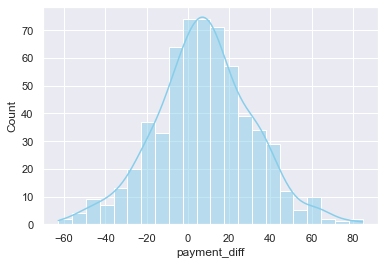

In [14]:
# 4. Generate a histogram of the difference and conduct a one-sample t-test.
sns.histplot(data = spending, x="payment_diff", color="skyblue", label="Payment Difference", kde=True)

In [15]:
# one sample t-test
import scipy.stats as stats

stats.ttest_1samp(a=spending["payment_diff"], popmean=0)

Ttest_1sampResult(statistic=8.202692282398393, pvalue=1.4429447558303775e-15)

**5. Interpret your results**  
*The t test statistic is 8.20269 and the corresponding p-value is 1.4429447558303775e-15, a decimal much smaller than the common significance threshold 0.05. That means there is a significant difference between the amounts spent before and after the program started, and the payment after program started is significantly higher than before it started.*